In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("dataset_output/libras_minds/libras_minds_openpose.csv")

In [3]:
df

,Unnamed: 0,category,video_name,frame,hand_0_0_x,hand_0_0_y,hand_0_0_z,hand_0_1_x,hand_0_1_y,hand_0_1_z,...,pose_22_y,pose_22_z,pose_23_x,pose_23_y,pose_23_z,pose_24_x,pose_24_y,pose_24_z,missing_hand,missing_face
0,0,Acontecer,01AcontecerSinalizador01-1.mp4,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
1,1,Acontecer,01AcontecerSinalizador01-1.mp4,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
2,2,Acontecer,01AcontecerSinalizador01-1.mp4,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
3,3,Acontecer,01AcontecerSinalizador01-1.mp4,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
4,4,Acontecer,01AcontecerSinalizador01-1.mp4,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161434,8670,Vontade,20VontadeSinalizador12-5.mp4,162,0.614689,0.910987,0.588928,0.598457,0.922928,0.627919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
161435,8671,Vontade,20VontadeSinalizador12-5.mp4,163,0.614785,0.908597,0.584819,0.598921,0.922699,0.580145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
161436,8672,Vontade,20VontadeSinalizador12-5.mp4,164,0.614690,0.911093,0.602180,0.598085,0.925853,0.639054,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
161437,8673,Vontade,20VontadeSinalizador12-5.mp4,165,0.614768,0.910723,0.575162,0.599248,0.924518,0.586799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False


In [4]:
df.columns

Index(['Unnamed: 0', 'category', 'video_name', 'frame', 'hand_0_0_x',
       'hand_0_0_y', 'hand_0_0_z', 'hand_0_1_x', 'hand_0_1_y', 'hand_0_1_z',
       ...
       'pose_22_y', 'pose_22_z', 'pose_23_x', 'pose_23_y', 'pose_23_z',
       'pose_24_x', 'pose_24_y', 'pose_24_z', 'missing_hand', 'missing_face'],
      dtype='object', length=417)

In [57]:
hand_columns = [i for i in df.columns if i.startswith("hand_")]
face_columns = [i for i in df.columns if i.startswith("face_")]

In [58]:
df["missing_hand"] = eval(" & ".join([f"(df['{h}'] == 0)" for h in hand_columns]))

In [59]:
df["missing_face"] = eval(" & ".join([f"(df['{h}'] == 0)" for h in face_columns]))

In [5]:
df[["missing_hand", "missing_face"]].value_counts()

missing_hand  missing_face
False         False           160066
True          False             1371
False         True                 2
Name: count, dtype: int64

In [6]:
total_frames = len(df)
total_videos = len(df["video_name"].unique())

missing_face = len(df[df["missing_face"]])
missing_face_percent = round(missing_face/total_frames * 100, 2)
missing_face_frame_median = df[df["missing_face"] == True]["frame"].median()
missing_face_video_count = len(df[df["missing_face"] == True]["video_name"].unique())
missing_face_video_percent = round(missing_face_video_count/total_videos * 100, 2)

missing_hand = len(df[df["missing_hand"]])
missing_hand_percent = round(missing_hand/total_frames * 100, 2)
missing_hand_frame_median = df[df["missing_hand"] == True]["frame"].median()
missing_hand_video_count = len(df[df["missing_hand"] == True]["video_name"].unique())
missing_hand_video_percent = round(missing_hand_video_count/total_videos * 100, 2)


print("Total frames:", total_frames)
print("Total videos:", total_videos)
print()
print(f"Frames missing face: {missing_face} ({missing_face_percent}%)")
print(f"Median Frame missing face: {missing_face_frame_median}")
print(f"Videos missing face: {missing_face_video_count} ({missing_face_video_percent}%)")
print()
print(f"Frames missing hand: {missing_hand} ({missing_hand_percent}%)")
print(f"Median Frame missing hand: {missing_hand_frame_median}")
print(f"Videos missing hand: {missing_hand_video_count} ({missing_hand_video_percent}%)")

Total frames: 161439
Total videos: 1158

Frames missing face: 2 (0.0%)
Median Frame missing face: 65.0
Videos missing face: 2 (0.17%)

Frames missing hand: 1371 (0.85%)
Median Frame missing hand: 89.0
Videos missing hand: 97 (8.38%)


Text(0, 0.5, 'Video Count')

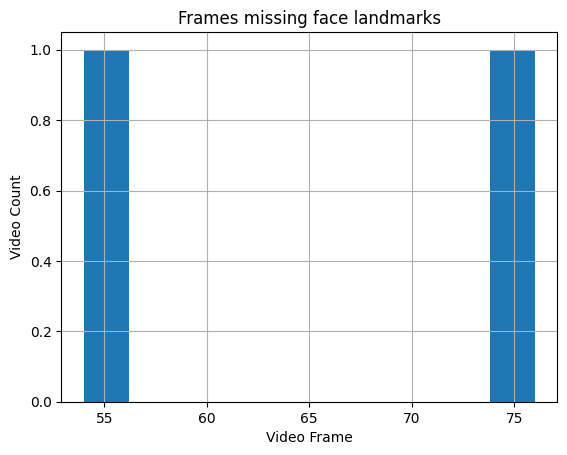

In [7]:
df[df["missing_face"] == True]["frame"].hist()
plt.title("Frames missing face landmarks")
plt.xlabel("Video Frame")
plt.ylabel("Video Count")

Text(0, 0.5, 'Video Count')

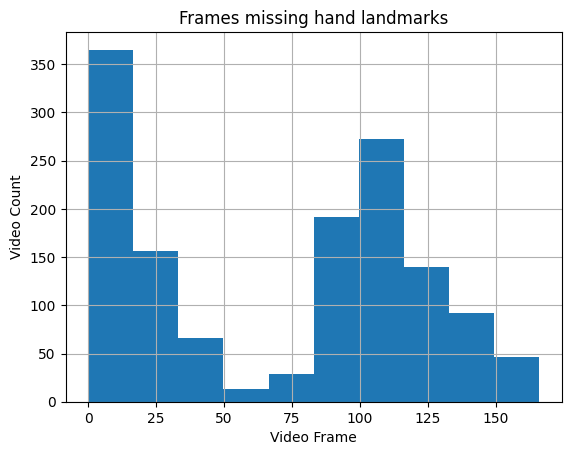

In [8]:
df[df["missing_hand"] == True]["frame"].hist()
plt.title("Frames missing hand landmarks")
plt.xlabel("Video Frame")
plt.ylabel("Video Count")

Text(0, 0.5, 'Frame Count')

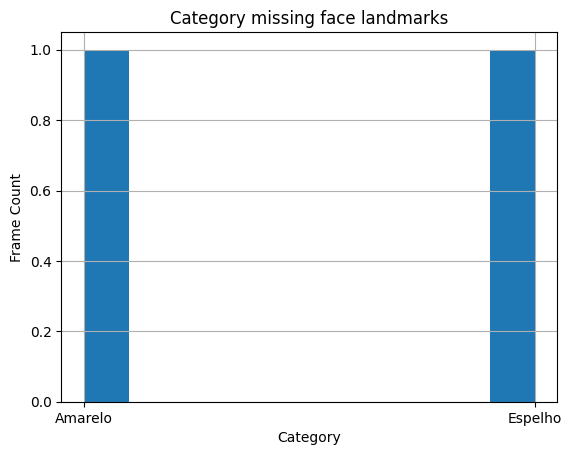

In [9]:
df[df["missing_face"] == True]["category"].hist()
plt.title("Category missing face landmarks")
plt.xlabel("Category")
plt.ylabel("Frame Count")

Text(0, 0.5, 'Frame Count')

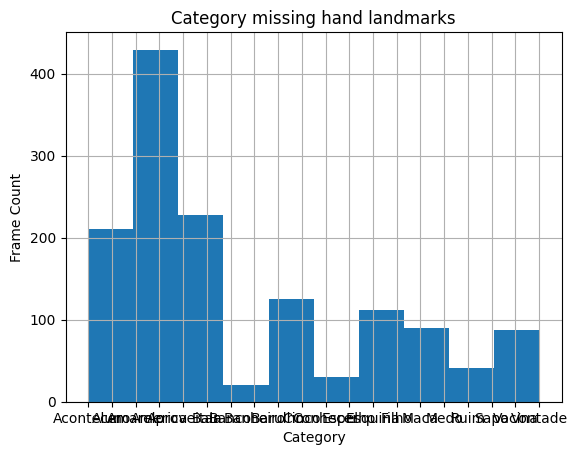

In [10]:
df[df["missing_hand"] == True]["category"].hist()
plt.title("Category missing hand landmarks")
plt.xlabel("Category")
plt.ylabel("Frame Count")

In [11]:
print("Classes without hand problems:", 10 - len(df[df["missing_hand"] == True]["category"].unique()))

Classes without hand problems: -10
